# Analysis of fan engagement for VeloCityX: Driving engagement and monetization strategies

### Introduction:
VeloCityX is designed to enhance fan engagement and monetize autonomous racing. This analysis explores how fan challenges, virtual merchandise purchases, and sponsorship interactions contribute to engagement and revenue. By using data-driven insights, we aim to optimize fan challenges, improve merchandise sales, and provide actionable strategies for driving fan engagement.

In this project, we will:
1. Investigate trends such as which users are most likely to purchase virtual merchandise.
2. Explore correlations between user activities during race events and their merchandise purchases and sponsorship interaction.
3. Apply clustering techniques to identify distinct user segments.
4. Propose a new fan challenge based on the analysis to increase engagement and monetization.

Deliverables include:
- Data cleaning and clustering analysis.
- Visualizations to support key insights.
- A proposed fan challenge to boost fan engagement and revenue.

In [36]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset from the specified file path
file_path = '/Users/johnsterlind/Downloads/2025-VeloCityX-Expanded-Fan-Engagement-Data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify the contents
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent)
0,U001,5,80,3,10,120,20
1,U002,8,60,1,8,100,35
2,U003,3,90,0,6,90,5
3,U004,7,70,2,15,140,40
4,U005,2,50,5,3,60,8


In [37]:
# Select relevant features for clustering
features = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 
            'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
            'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

# Standardize the selected features to ensure all have equal weight in clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

In [38]:
from sklearn.preprocessing import StandardScaler

# Select the relevant numeric columns for clustering
numeric_columns = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                   'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                   'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)']

# Standardize the numeric columns to prepare for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numeric_columns])

In [39]:
from sklearn.cluster import KMeans

# Perform K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add the resulting cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows of the dataset with the newly added cluster labels
data.head()

,User ID,Fan Challenges Completed,Predictive Accuracy (%),Virtual Merchandise Purchases,Sponsorship Interactions (Ad Clicks),Time on Live 360 (mins),Real-Time Chat Activity (Messages Sent),Cluster
0,U001,5,80,3,10,120,20,1
1,U002,8,60,1,8,100,35,0
2,U003,3,90,0,6,90,5,2
3,U004,7,70,2,15,140,40,0
4,U005,2,50,5,3,60,8,2


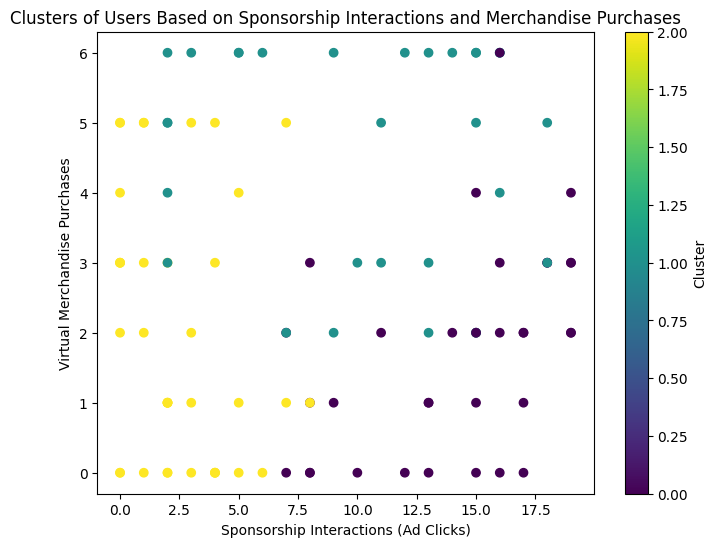

In [30]:
# Visualize the clusters for Sponsorship Interactions vs Virtual Merchandise Purchases
plt.figure(figsize=(8,6))
plt.scatter(data['Sponsorship Interactions (Ad Clicks)'], data['Virtual Merchandise Purchases'], 
            c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Users Based on Sponsorship Interactions and Merchandise Purchases')
plt.xlabel('Sponsorship Interactions (Ad Clicks)')
plt.ylabel('Virtual Merchandise Purchases')
plt.colorbar(label='Cluster')
plt.show()

In [31]:
# Analyze the clusters to understand which users are most likely to purchase virtual merchandise
# Select the relevant numeric columns, including the 'Cluster' label
numeric_columns = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                   'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                   'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Cluster']

# Group the data by 'Cluster' and calculate the mean for each group
cluster_analysis = data[numeric_columns].groupby('Cluster').mean()

# Display the cluster analysis to observe differences between clusters
print(cluster_analysis)

         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.823529                71.911765   
1                        7.310345                83.551724   
2                        5.486486                71.108108   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             1.705882                             14.088235   
1                             4.620690                             10.172414   
2                             2.027027                              2.540541   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
Cluster                                                                    
0                     122.911765                                33.794118  
1                     132.172414                            

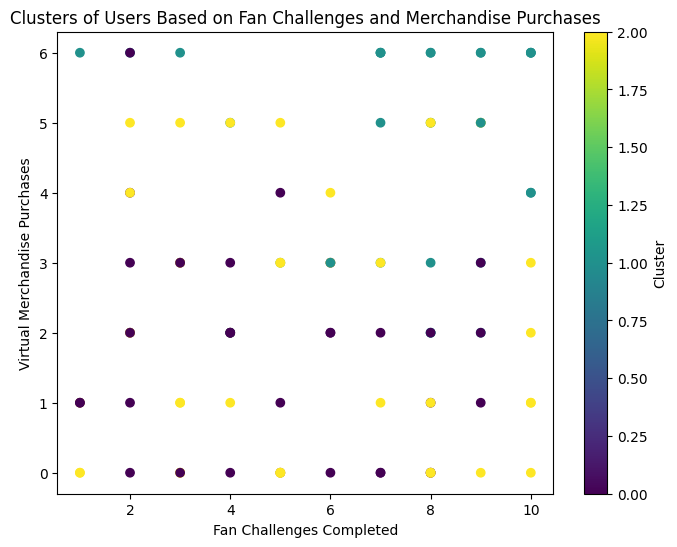

In [32]:
# Visualize the clusters for Fan Challenges Completed vs Virtual Merchandise Purchases
plt.figure(figsize=(8,6))
plt.scatter(data['Fan Challenges Completed'], data['Virtual Merchandise Purchases'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Users Based on Fan Challenges and Merchandise Purchases')
plt.xlabel('Fan Challenges Completed')
plt.ylabel('Virtual Merchandise Purchases')
plt.colorbar(label='Cluster')
plt.show()

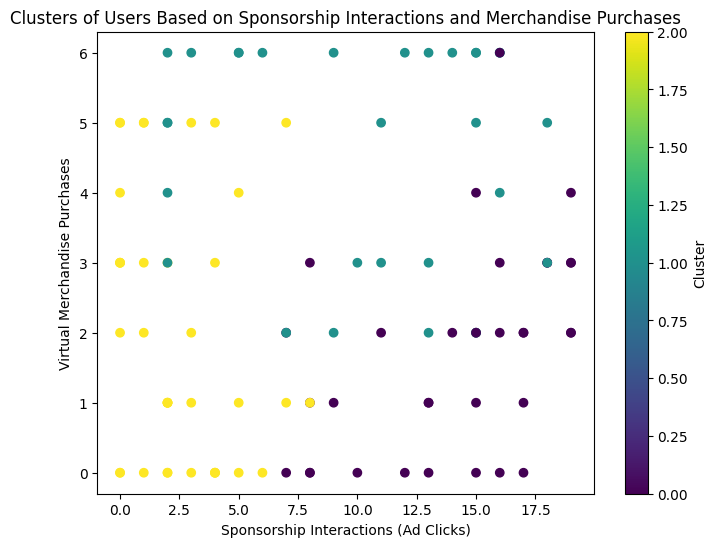

In [33]:
# Visualize the clusters for Sponsorship Interactions vs Virtual Merchandise Purchases
plt.figure(figsize=(8,6))
plt.scatter(data['Sponsorship Interactions (Ad Clicks)'], data['Virtual Merchandise Purchases'], c=data['Cluster'], cmap='viridis')
plt.title('Clusters of Users Based on Sponsorship Interactions and Merchandise Purchases')
plt.xlabel('Sponsorship Interactions (Ad Clicks)')
plt.ylabel('Virtual Merchandise Purchases')
plt.colorbar(label='Cluster')
plt.show()

In [34]:
# Analyze the clusters to understand which users are most likely to purchase virtual merchandise
# Select only the numeric columns
numeric_columns = ['Fan Challenges Completed', 'Predictive Accuracy (%)', 
                   'Virtual Merchandise Purchases', 'Sponsorship Interactions (Ad Clicks)', 
                   'Time on Live 360 (mins)', 'Real-Time Chat Activity (Messages Sent)', 'Cluster']

# Perform the groupby and aggregation
cluster_analysis = data[numeric_columns].groupby('Cluster').mean()

# Display the cluster analysis
print(cluster_analysis)

         Fan Challenges Completed  Predictive Accuracy (%)  \
Cluster                                                      
0                        4.823529                71.911765   
1                        7.310345                83.551724   
2                        5.486486                71.108108   

         Virtual Merchandise Purchases  Sponsorship Interactions (Ad Clicks)  \
Cluster                                                                        
0                             1.705882                             14.088235   
1                             4.620690                             10.172414   
2                             2.027027                              2.540541   

         Time on Live 360 (mins)  Real-Time Chat Activity (Messages Sent)  
Cluster                                                                    
0                     122.911765                                33.794118  
1                     132.172414                            

## Proposed fan challenge: 'Race to Rewards'

To increase engagement and drive virtual merchandise purchases, we propose the "Race to Rewards" challenge:

**Objective**: Motivate users to complete more fan challenges and engage with the app to unlock exclusive rewards and merchandise.

**Mechanics**:
- Users unlock exclusive virtual merchandise after completing a set number of challenges.
- Additional points are awarded for users with high predictive accuracy in race outcomes, allowing them to access rare rewards faster.
- Users who interact with sponsorship ads more frequently will receive discounts on merchandise purchases.
- A leaderboard tracks the top participants, encouraging competition to earn the most rewards.

This challenge leverages the correlation between fan engagement and merchandise purchases, while also promoting sponsorship interactions to drive further monetization.

## Conclusion
This analysis highlights the importance of fan challenges and sponsorship interactions in driving virtual merchandise purchases for VeloCityX. Based on the data, we propose the "Unlock Merch Madness" challenge to further incentivize user engagement and increase monetization. By combining fan challenges with rewards and sponsorship incentives, VeloCityX can create a more immersive and profitable fan experience.